<a href="https://colab.research.google.com/github/suyash1574/GEN-AI-Workshop/blob/main/src/day1/notebooks/02_ai_refresher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 1: AI Refresher - Understanding the Fundamentals

Welcome to the AI Refresher! This notebook is designed to help you understand the core concepts of AI/ML through hands-on exploration and research.

## 🎯 Learning Objectives
By the end of this notebook, you will:
- Understand the ML pipeline: data → train → validate → infer
- Implement a basic neural network from scratch
- Explore forward and backward propagation
- Understand loss functions and optimization
- Connect theory to real-world AI applications

## 📚 Research Tasks
Throughout this notebook, you'll see **🔍 RESEARCH** sections. These require you to:
1. Research the concept online
2. Discuss with your pair partner
3. Implement the missing code
4. Test your understanding

---

## 1. The Machine Learning Pipeline

Every ML project follows the same basic pipeline:
**Data → Train → Validate → Infer**

Let's explore each step with a simple example.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

### Step 1: Data Generation and Exploration

🔍 **RESEARCH TASK 1**:
- What is the difference between supervised and unsupervised learning?
- What type of problem are we creating below?
- Research `make_classification` function parameters

In [10]:
from sklearn.datasets import make_classification

# Generate synthetic dataset
# TODO: Fill in the parameters for make_classification
# Hint: We want 1000 samples, 2 features, 2 classes, and some noise
X, y = make_classification(
    n_samples=1000,     # Number of samples
    n_features=2,    # Number of features
    n_classes=2,     # Number of classes
    n_redundant=0,      # No redundant features
    n_informative=2,    # Make sure both features are informative
    n_clusters_per_class=1, # Keep it simple with one cluster per class
    flip_y=0.05,        # Introduce some noise (5% of labels flipped)
    random_state=42
)

print(f"Dataset shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Unique labels: {np.unique(y)}")

Dataset shape: (1000, 2)
Labels shape: (1000,)


NameError: name 'np' is not defined

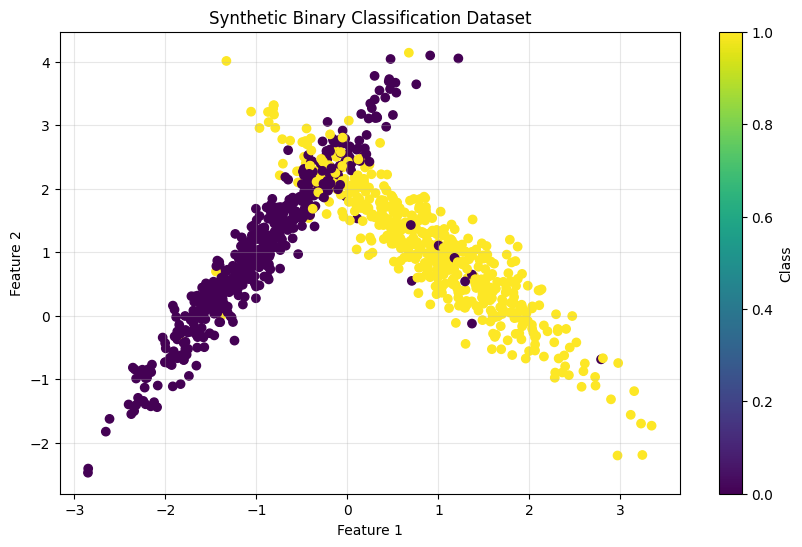

NameError: name 'np' is not defined

In [11]:
import matplotlib.pyplot as plt

# Visualize the data
plt.figure(figsize=(10, 6))

# TODO: Create a scatter plot of the data
# Hint: Use different colors for different classes
# Use plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Binary Classification Dataset')
plt.colorbar(label='Class')
plt.grid(True, alpha=0.3)
plt.show()

# TODO: Calculate and print basic statistics
print(f"Class distribution: {np.bincount(y)}")  # Hint: Use np.bincount(y)
print(f"Feature 1 range: [{X[:, 0].min():.2f}, {X[:, 0].max():.2f}]")  # Hint: Use X[:, 0].min() and max()
print(f"Feature 2 range: [{X[:, 1].min():.2f}, {X[:, 1].max():.2f}]")  # Hint: Use X[:, 1].min() and max()

### Step 2: Data Splitting

🔍 **RESEARCH TASK 2**:
- Why do we split data into train/validation/test sets?
- What is the typical ratio for each split?
- What is the difference between validation and test sets?
- Research the concept of "data leakage"

In [12]:
from sklearn.model_selection import train_test_split

# TODO: Split the data into training and testing sets
# Hint: Use train_test_split with test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features
    y,  # Labels
    test_size=0.2,  # What percentage for testing?
    random_state=42,
    stratify=y    # Should we maintain class balance? Use y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training labels distribution: {np.bincount(y_train)}")  # Use np.bincount
print(f"Testing labels distribution: {np.bincount(y_test)}")   # Use np.bincount

Training set shape: (800, 2)
Testing set shape: (200, 2)


NameError: name 'np' is not defined

## 2. Neural Networks from Scratch

Let's build a simple neural network to understand the fundamentals.

🔍 **RESEARCH TASK 3**:
- What is a perceptron?
- What is the difference between a perceptron and a neural network?
- Research the sigmoid activation function
- What is the purpose of activation functions?

In [13]:
import numpy as np

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        """
        Initialize a simple 2-layer neural network

        Args:
            input_size: Number of input features
            hidden_size: Number of neurons in hidden layer
            output_size: Number of output neurons
        """
        # TODO: Initialize weights and biases
        # Hint: Use np.random.randn() for random initialization
        # Scale by 0.01 to keep values small

        # Weights from input to hidden layer
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01  # Shape: (input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))                 # Shape: (1, hidden_size)

        # Weights from hidden to output layer
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01  # Shape: (hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))                 # Shape: (1, output_size)

    def sigmoid(self, x):
        """
        TODO: Implement sigmoid activation function
        Formula: 1 / (1 + exp(-x))

        Hint: Use np.exp() and be careful of numerical overflow
        You might want to clip x to prevent overflow
        """
        # Clip x to prevent overflow
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        """
        TODO: Implement derivative of sigmoid
        Formula: sigmoid(x) * (1 - sigmoid(x))
        """
        sig = self.sigmoid(x)
        return sig * (1 - sig)

    def forward(self, X):
        """
        TODO: Implement forward propagation

        Steps:
        1. Calculate z1 = X @ W1 + b1
        2. Calculate a1 = sigmoid(z1)
        3. Calculate z2 = a1 @ W2 + b2
        4. Calculate a2 = sigmoid(z2)

        Store intermediate values for backpropagation
        """
        # Input to hidden layer
        self.z1 = X @ self.W1 + self.b1  # Linear combination
        self.a1 = self.sigmoid(self.z1)  # Activation

        # Hidden to output layer
        self.z2 = self.a1 @ self.W2 + self.b2  # Linear combination
        self.a2 = self.sigmoid(self.z2)  # Final output

        return self.a2

    def compute_loss(self, y_true, y_pred):
        """
        TODO: Implement binary cross-entropy loss
        Formula: -[y*log(y_pred) + (1-y)*log(1-y_pred)]

        Hint: Add small epsilon to prevent log(0)
        """
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))  # Implement the formula above
        return loss

# Test the network initialization
network = SimpleNeuralNetwork(input_size=2, hidden_size=4, output_size=1)
print(f"W1 shape: {network.W1.shape}")
print(f"W2 shape: {network.W2.shape}")
print("Network initialized successfully!")

W1 shape: (2, 4)
W2 shape: (4, 1)
Network initialized successfully!


### Test Forward Propagation

🔍 **RESEARCH TASK 4**:
- What happens in forward propagation?
- Why do we need to store intermediate values?
- What should the output range be for binary classification?

In [5]:
# Test forward propagation with a few samples
test_input = X_train[:5]  # Take first 5 samples
test_labels = y_train[:5].reshape(-1, 1)  # Reshape for consistency

# TODO: Run forward propagation
predictions = network.forward(test_input)

print(f"Input shape: {test_input.shape}")
print(f"Predictions shape: {predictions.shape}")
print(f"Predictions: {predictions.flatten()}")
print(f"True labels: {test_labels.flatten()}")

# TODO: Calculate loss
loss = network.compute_loss(test_labels, predictions)
print(f"Initial loss: {loss:.4f}")

NameError: name 'X_train' is not defined

## 3. Backpropagation and Training

🔍 **RESEARCH TASK 5**:
- What is backpropagation?
- How does gradient descent work?
- What is a learning rate and how do you choose it?
- Research the chain rule in calculus

In [14]:
import numpy as np

# Add backpropagation to our network
def backward(self, X, y_true, y_pred):
    """
    TODO: Implement backpropagation

    WHAT IS BACKPROPAGATION?
    Backpropagation is like "learning from mistakes" - it calculates how much each weight
    contributed to the error, then adjusts weights to reduce that error.

    This is challenging! You need to:
    1. Calculate gradients for output layer
    2. Calculate gradients for hidden layer
    3. Update weights and biases

    Research the math behind backpropagation!
    """
    m = X.shape[0]  # Number of samples

    # STEP 1: Output layer gradients
    # How wrong were our predictions? (This is our starting error)
    # For binary cross-entropy loss: dL/dz2 = (y_pred - y_true) / m
    dz2 = (y_pred - y_true) / m  # Derivative of loss w.r.t. z2
    # How much did each weight W2 contribute to the error?
    # Chain rule: dL/dW2 = dL/dz2 × dz2/dW2
    # Since z2 = a1 @ W2 + b2, changing W2 by ΔW2 changes z2 by a1 @ ΔW2
    # So the gradient is: a1.T @ dz2
    dW2 = self.a1.T @ dz2 # TODO: Calculate gradient for W2 (use self.a1)
    # For bias: dL/db2 = dL/dz2 * dz2/db2 = dL/dz2 * 1
    # Since z2 = a1 @ W2 + b2, changing b2 by Δb2 changes z2 by Δb2
    # So the gradient is just dz2, but we sum over the batch
    # The bias b2 contributed to ALL of the errors in dz2
    # So the total effect of b2 is the SUM of all errors:
    db2 = np.sum(dz2, axis=0, keepdims=True)  # TODO: Calculate gradient for b2

    # STEP 2: Hidden layer gradients
    # Backpropagate error from output to hidden layer
    # Chain rule: dL/da1 = dL/dz2 * dz2/da1
    # Since z2 = a1 @ W2 + b2, changing a1 by Δa1 changes z2 by Δa1 @ W2
    # So: da1 = dz2 @ W2.T
    da1 = dz2 @ self.W2.T  # TODO: Backpropagate error to hidden layer
    # We have error w.r.t. a1, but we need error w.r.t. z1
    # Since a1 = sigmoid(z1), we use: dz1 = da1 * sigmoid'(z1)
    dz1 = da1 * self.sigmoid_derivative(self.z1)  # TODO: Apply derivative of activation function
    # Since z1 = X @ W1 + b1:
    dW1 = X.T @ dz1 # TODO: Calculate gradient for W1
    db1 = np.sum(dz1, axis=0, keepdims=True)  # TODO: Calculate gradient for b1

    return dW1, db1, dW2, db2

def update_weights(self, dW1, db1, dW2, db2, learning_rate):
    """
    TODO: Update weights using gradient descent
    Formula: weight = weight - learning_rate * gradient
    """
    self.W1 -= learning_rate * dW1
    self.b1 -= learning_rate * db1
    self.W2 -= learning_rate * dW2
    self.b2 -= learning_rate * db2

# Add methods to the class
SimpleNeuralNetwork.backward = backward
SimpleNeuralNetwork.update_weights = update_weights

### Training Loop

🔍 **RESEARCH TASK 6**:
- What is an epoch?
- What is batch training vs. online training?
- How do you know when to stop training?
- Research overfitting and underfitting

In [15]:
# Prepare data for training
X_train_norm = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)  # Normalize features
X_test_norm = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)    # Use training stats
y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

# Training parameters
epochs = 1000      # TODO: How many epochs? Try 1000
learning_rate = 0.1  # TODO: What learning rate? Try 0.1

# Initialize network
network = SimpleNeuralNetwork(input_size=2, hidden_size=4, output_size=1)

# Storage for plotting
train_losses = []
test_losses = []

# TODO: Implement training loop
for epoch in range(epochs):
    # Forward propagation
    train_pred = network.forward(X_train_norm)

    # Calculate loss
    train_loss = network.compute_loss(y_train_reshaped, train_pred)

    # Backpropagation
    dW1, db1, dW2, db2 = network.backward(X_train_norm, y_train_reshaped, train_pred)

    # Update weights
    network.update_weights(dW1, db1, dW2, db2, learning_rate)

    # Evaluate on test set (for monitoring)
    test_pred = network.forward(X_test_norm)
    test_loss = network.compute_loss(y_test_reshaped, test_pred)

    # Store losses
    train_losses.append(train_loss)
    test_losses.append(test_loss)

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Test Loss = {test_loss:.4f}")

print("Training completed!")

Epoch 0: Train Loss = 0.6932, Test Loss = 0.6932
Epoch 100: Train Loss = 0.6931, Test Loss = 0.6931
Epoch 200: Train Loss = 0.6927, Test Loss = 0.6927
Epoch 300: Train Loss = 0.6907, Test Loss = 0.6905
Epoch 400: Train Loss = 0.6788, Test Loss = 0.6780
Epoch 500: Train Loss = 0.6260, Test Loss = 0.6233
Epoch 600: Train Loss = 0.5119, Test Loss = 0.5088
Epoch 700: Train Loss = 0.4082, Test Loss = 0.4071
Epoch 800: Train Loss = 0.3500, Test Loss = 0.3500
Epoch 900: Train Loss = 0.3207, Test Loss = 0.3204
Training completed!


### Analyze Training Results

🔍 **RESEARCH TASK 7**:
- How do you interpret loss curves?
- What does it mean if train loss decreases but test loss increases?
- What metrics can we use to evaluate binary classification?

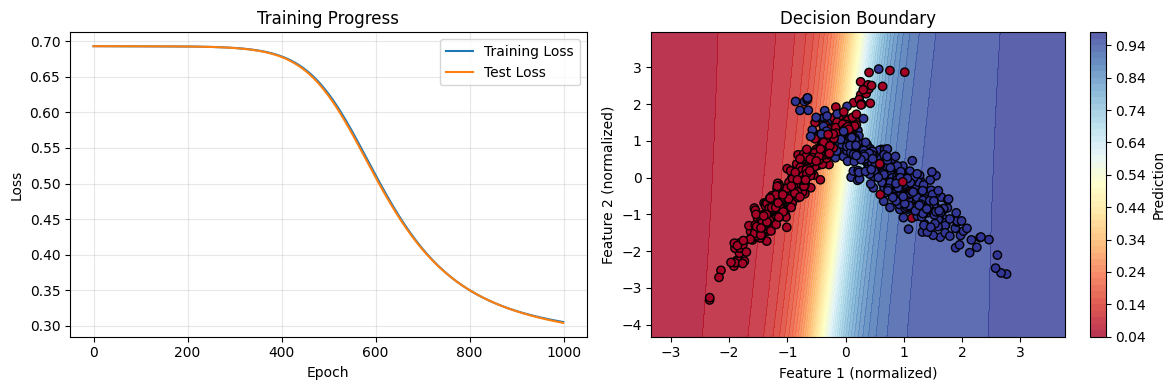

In [16]:
# Plot training curves
plt.figure(figsize=(12, 4))

# Loss curves
plt.subplot(1, 2, 1)
# TODO: Plot training and test losses
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Progress')
plt.legend()
plt.grid(True, alpha=0.3)

# Decision boundary visualization
plt.subplot(1, 2, 2)

# Create a mesh to plot decision boundary
h = 0.02
x_min, x_max = X_train_norm[:, 0].min() - 1, X_train_norm[:, 0].max() + 1
y_min, y_max = X_train_norm[:, 1].min() - 1, X_train_norm[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# TODO: Make predictions on the mesh
mesh_points = np.column_stack([xx.ravel(), yy.ravel()])
Z = network.forward(mesh_points).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdYlBu')
plt.colorbar(label='Prediction')

# Plot training data
scatter = plt.scatter(X_train_norm[:, 0], X_train_norm[:, 1], c=y_train, cmap='RdYlBu', edgecolors='black')
plt.xlabel('Feature 1 (normalized)')
plt.ylabel('Feature 2 (normalized)')
plt.title('Decision Boundary')

plt.tight_layout()
plt.show()

In [17]:
# Calculate accuracy
def calculate_accuracy(y_true, y_pred):
    """
    TODO: Calculate classification accuracy
    Hint: Convert probabilities to binary predictions using threshold 0.5
    """
    binary_pred = (y_pred > 0.5).astype(int)
    accuracy = np.mean(binary_pred == y_true.reshape(-1, 1))  # Compare with y_true and calculate mean
    return accuracy

# Get final predictions
train_pred_final = network.forward(X_train_norm)
test_pred_final = network.forward(X_test_norm)

# TODO: Calculate accuracies
train_accuracy = calculate_accuracy(y_train, train_pred_final)
test_accuracy = calculate_accuracy(y_test, test_pred_final)

print(f"\nFinal Results:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Final Test Loss: {test_losses[-1]:.4f}")


Final Results:
Training Accuracy: 0.8850
Test Accuracy: 0.8850
Final Training Loss: 0.3053
Final Test Loss: 0.3040


## 4. Real-World AI Applications

🔍 **RESEARCH TASK 8**:
Research and discuss with your partner:
- How are the concepts we just learned used in:
  - **Chatbots**: How do language models use neural networks?
  - **Recommendation engines**: How does Netflix recommend movies?
  - **Image detectors**: How does your phone recognize faces?
- What are the key differences between the simple network we built and modern deep learning models?

### Discussion Questions (Work with your partner)

**TODO: Discuss and write your answers below:**

1. **Chatbots (like ChatGPT)**:
   - How might the forward propagation we implemented relate to text generation?
   - *Your answer: ____*

2. **Recommendation Systems**:
   - How could you modify our binary classifier to recommend products?
   - *Your answer: ____*

3. **Image Recognition**:
   - Our network used 2 features. How many "features" does an image have?
   - *Your answer: ____*

4. **Scaling Up**:
   - Our network had 4 hidden neurons. How many do you think GPT-4 has?
   - *Your answer: ____*

## 5. Why Open Source?

🔍 **RESEARCH TASK 9**:
Research the benefits of open-source AI:
- **Community support**: Find 3 popular open-source AI libraries
- **Reproducibility**: Why is this important in research?
- **Transparency**: How does this help with AI safety?
- **Cost**: Compare costs of using open-source vs. proprietary models

In [ ]:
# Let's explore some popular open-source libraries
libraries_to_explore = {
    'PyTorch': 'Deep learning framework by Meta',
    'TensorFlow': 'Deep learning framework by Google',
    'Hugging Face Transformers': 'Pre-trained language models',
    'scikit-learn': 'Traditional machine learning',
    'OpenCV': 'Computer vision library'
}

print("Popular Open-Source AI Libraries:")
for lib, description in libraries_to_explore.items():
    print(f"• {lib}: {description}")

print("\n🔍 TODO: Research Task")
print("For each library above:")
print("1. Visit their GitHub repository")
print("2. Check how many stars and contributors they have")
print("3. Look at their documentation")
print("4. Find one interesting example or use case")

## 6. Reflection and Next Steps

### What You've Accomplished
✅ **Implemented a neural network from scratch**
✅ **Understood forward and backward propagation**
✅ **Trained a model and evaluated its performance**
✅ **Connected theory to real-world applications**
✅ **Explored the open-source AI ecosystem**

### Prepare for Day 2
Tomorrow we'll explore:
- **Large Language Models**: Much bigger versions of what we built today
- **Fine-tuning**: Adapting pre-trained models for specific tasks
- **RAG (Retrieval-Augmented Generation)**: Combining knowledge retrieval with generation
- **Building AI Applications**: Creating user interfaces with Gradio

In [ ]:
# Final challenge: Experiment with hyperparameters
print("🎯 FINAL CHALLENGE:")
print("Try modifying these parameters and observe the effects:")
print("1. learning_rate: Try 0.01, 0.1, 1.0")
print("2. hidden_size: Try 2, 8, 16 neurons")
print("3. epochs: Try 500, 2000")
print("4. Add more hidden layers")

print("\n📝 Questions to consider:")
print("• Which combination gives the best test accuracy?")
print("• How does training time change with more neurons?")
print("• Can you achieve >95% accuracy?")

# TODO: Your experiments here
# Copy the training code above and modify the parameters

## 🎉 Congratulations!

You've successfully:
- ✅ Built and trained a neural network from scratch
- ✅ Understood the mathematics behind AI
- ✅ Connected theory to real-world applications
- ✅ Explored the open-source ecosystem
- ✅ Prepared for advanced topics in Day 2

**Share your insights**: What was the most surprising thing you learned?

---
*AI Refresher Complete - Ready for Day 2! 🚀*